In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Diwali Sales Data.csv",encoding="unicode_escape") #to upload the dataset

In [3]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


DATA CLEANING

In [4]:
df.shape #(for checking the total column and rows)

(11251, 15)

In [5]:
df.info() #(for checking the information like column name,null values and its datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
for col in df:
    print(col,":",df[col].unique())
    print("****************************************")  #(to check the unique values)

User_ID : [1002903 1000732 1001990 ... 1001542 1004378 1005258]
****************************************
Cust_name : ['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
****************************************
Product_ID : ['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
****************************************
Gender : ['F' 'M']
****************************************
Age Group : ['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45']
****************************************
Age : [28 35 16 25 61 26 34 20 46 24 48 29 54 19 30 53 83 33 40 39 32 36 55 27
 72 45 43 47 22 52 18 21 38 37 23 49 42 50 31 44 41 66 15 51 77 87 79 71
 88 58 82 62 92 12 63 17 13 67 90 56 75 81 64 73 84 14 76 86 89 68 91 85
 70 80 65 74 69 78 57 60 59]
****************************************
Marital_Status : [0 1]
****************************************
State : ['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Madhya

In [7]:
#drop unwanted columns:
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [8]:
df.isnull().sum()#to check total null values in the column

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#checking mean values of amount column
df["Amount"].mean()

9453.610857727557

In [10]:
#replacing null values to mean 
df["Amount"].fillna(9453,inplace=True)

In [11]:
df.isnull().sum()#to confirm the replacements of mean value with nan

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
#to convert dtype of amount from float to int
df["Amount"]=df["Amount"].astype("int") 

In [13]:
df.shape

(11251, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11251 non-null  int64 
 1   Cust_name         11251 non-null  object
 2   Product_ID        11251 non-null  object
 3   Gender            11251 non-null  object
 4   Age Group         11251 non-null  object
 5   Age               11251 non-null  int64 
 6   Marital_Status    11251 non-null  int64 
 7   State             11251 non-null  object
 8   Zone              11251 non-null  object
 9   Occupation        11251 non-null  object
 10  Product_Category  11251 non-null  object
 11  Orders            11251 non-null  int64 
 12  Amount            11251 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.1+ MB


In [15]:
#(to check min,max,std,etc. of columns)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.609901
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569169
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9453.609901
std,12.754122,1.115047,5219.569169
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


EXPLORATORY DATA ANALYSIS

GENDER

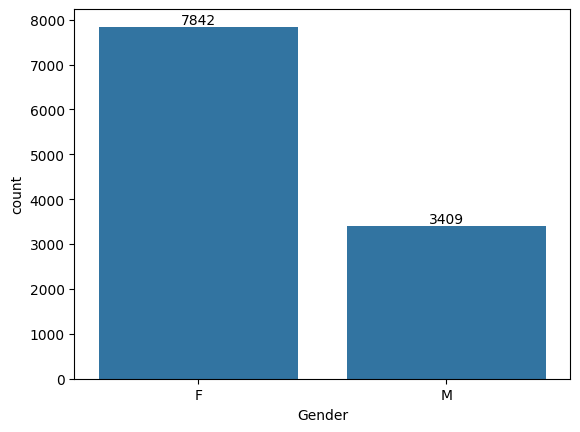

In [17]:
cp=sns.countplot(x="Gender",data=df)
for i in cp.containers:#(for label)
    cp.bar_label(i)
plt.show()

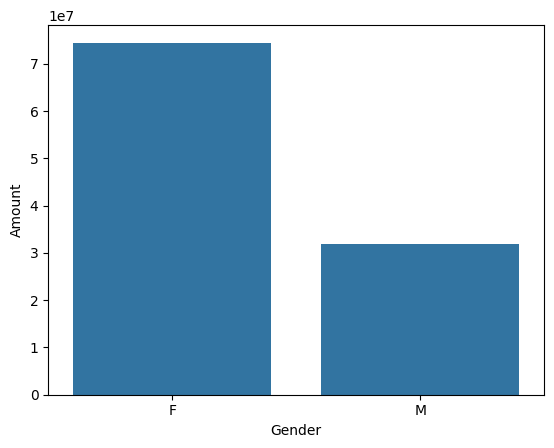

In [18]:
total_sales=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Gender",y="Amount",data=total_sales)
plt.show()

From above graph as we can see that most of the buyers are female and theire purchasing power is greater than man

AGE

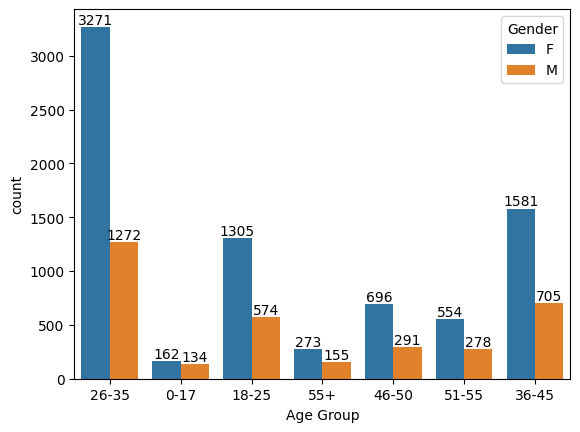

In [19]:
age=sns.countplot(data=df,x="Age Group",hue="Gender")
for i in age.containers:#(for label)
    age.bar_label(i)
plt.show()

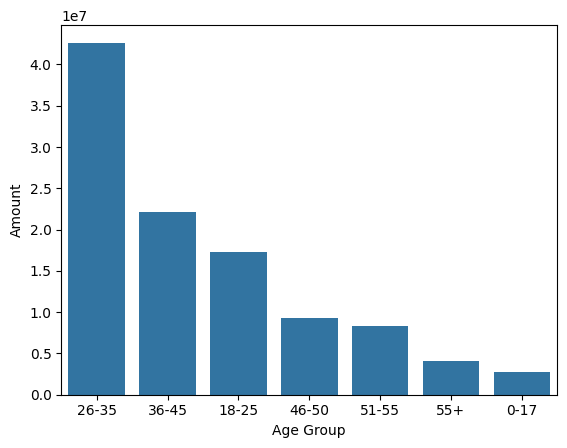

In [20]:
Age_G=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group",y="Amount",data=Age_G)
plt.show()

From above graph as we can see that most of the buyers are from the age group of 26-35 female

State

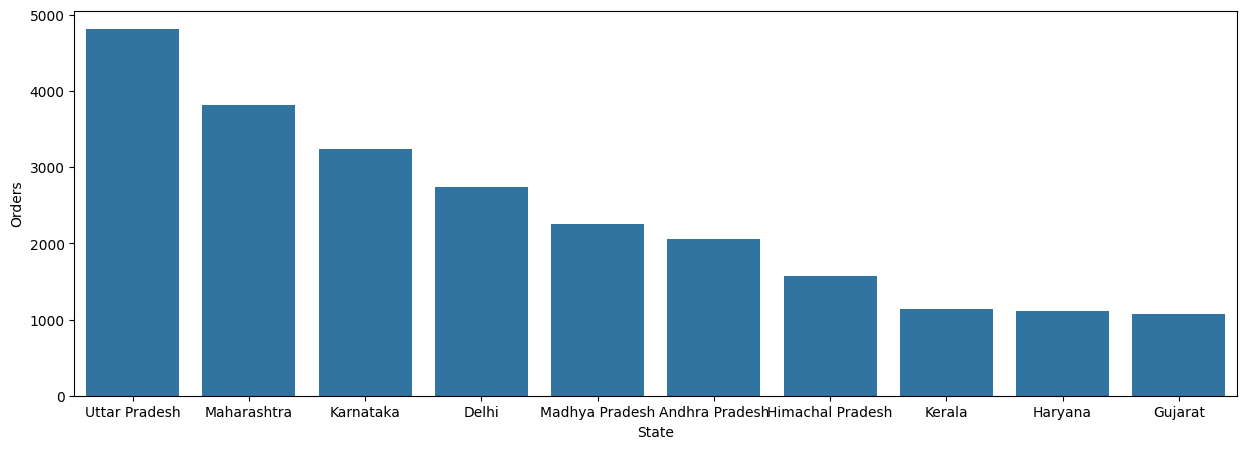

In [21]:
#total orders by top 10 states
state=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x="State",y="Orders",data=state)
plt.show()

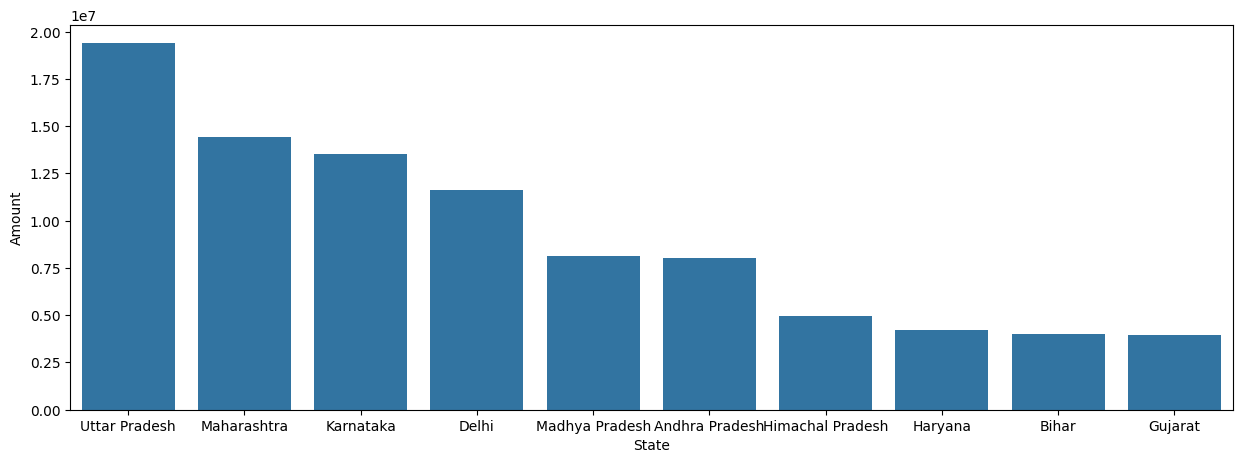

In [22]:
#total sales by top 10 states
state=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x="State",y="Amount",data=state)
plt.show()

From above graph as we can see that most of the orders and sales are from the uttar pradesh,maharashtra and karnataka respectively.

Marital Status

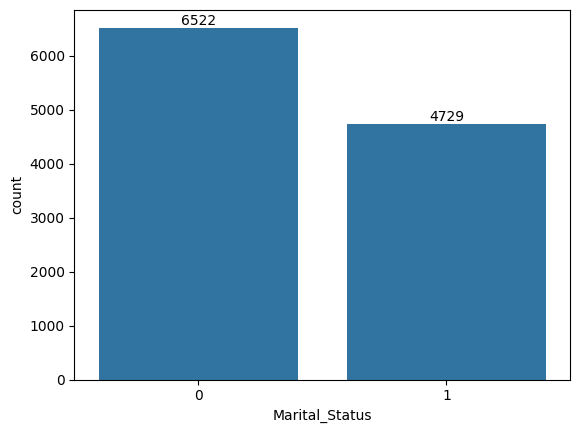

<Figure size 700x500 with 0 Axes>

In [23]:
ms=sns.countplot(data=df,x="Marital_Status")
plt.figure(figsize=(7,5))
for i in ms.containers:
     ms.bar_label(i)
plt.show()

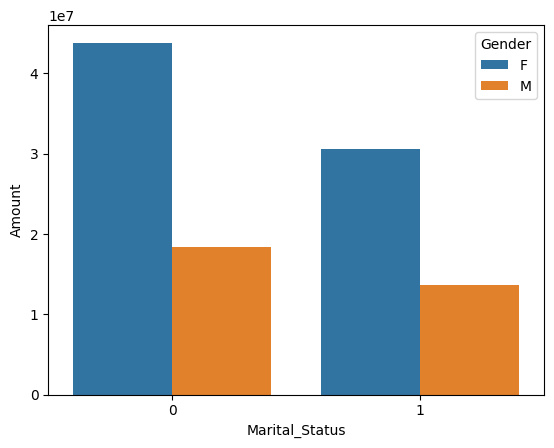

In [24]:
mg=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Marital_Status",y="Amount",data=mg,hue="Gender")
plt.show()

From above graph as we can see that most of the buyers are married(women) and their purchasing power is high

Occupation

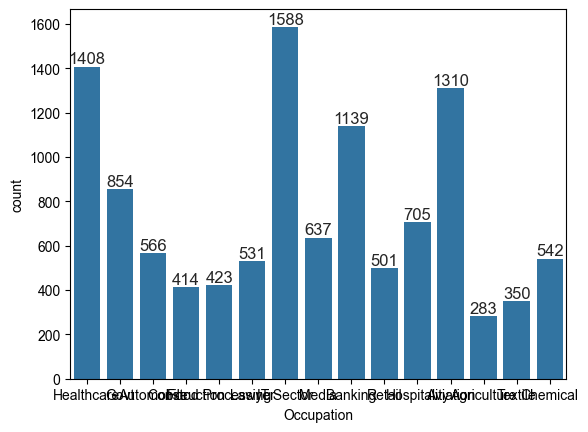

In [25]:
oc=sns.countplot(data=df,x="Occupation")
sns.set(rc={"figure.figsize":(30,5)})
for i in oc.containers:
     oc.bar_label(i)
plt.show()

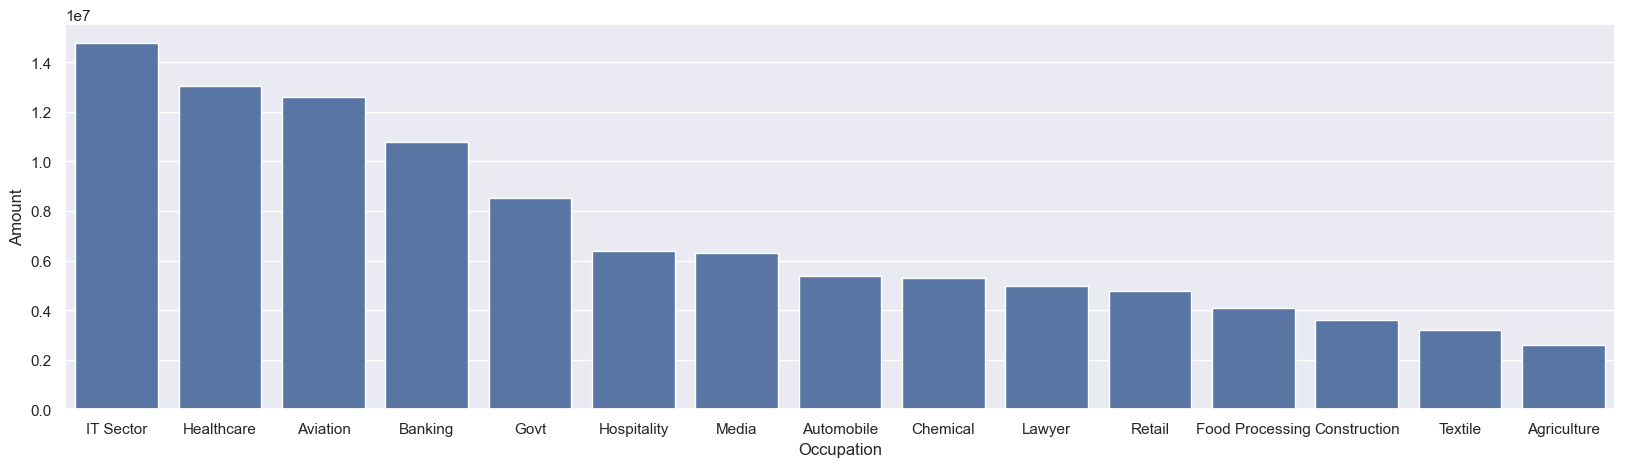

In [26]:
mg=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(x="Occupation",y="Amount",data=mg)
plt.show()

from above graph we can see that most of the buyers are from IT sector,Healthcareand Aviation sector.

Product Category

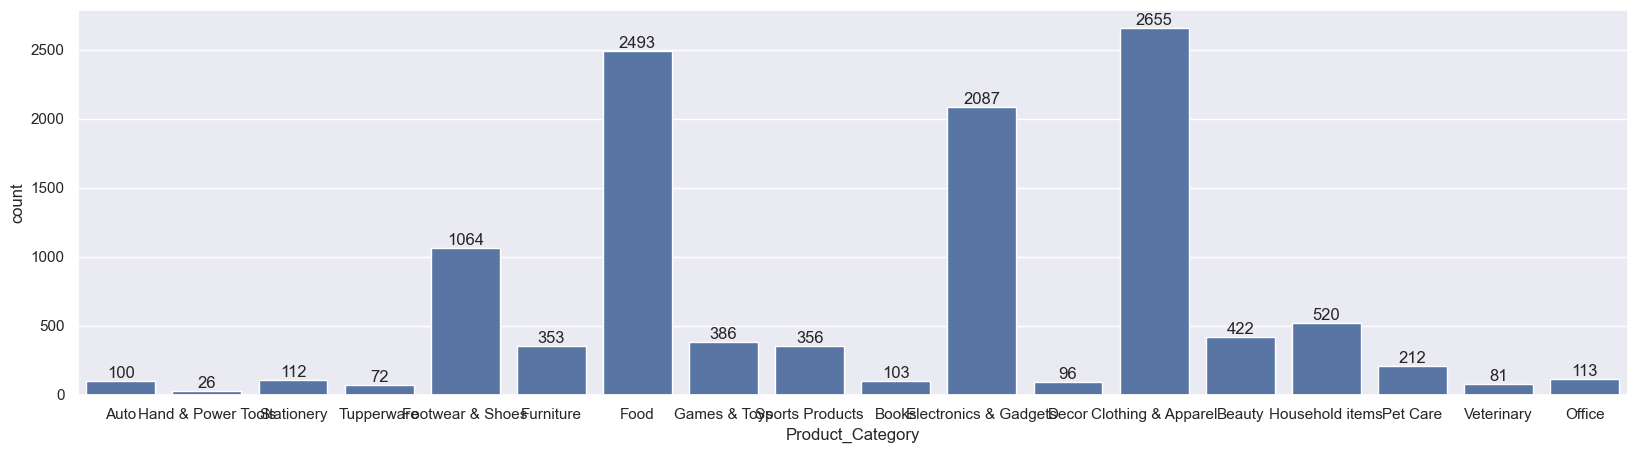

In [27]:
pc=sns.countplot(data=df,x="Product_Category")
sns.set(rc={"figure.figsize":(15,5)})
for i in pc.containers:
     pc.bar_label(i)
plt.show()

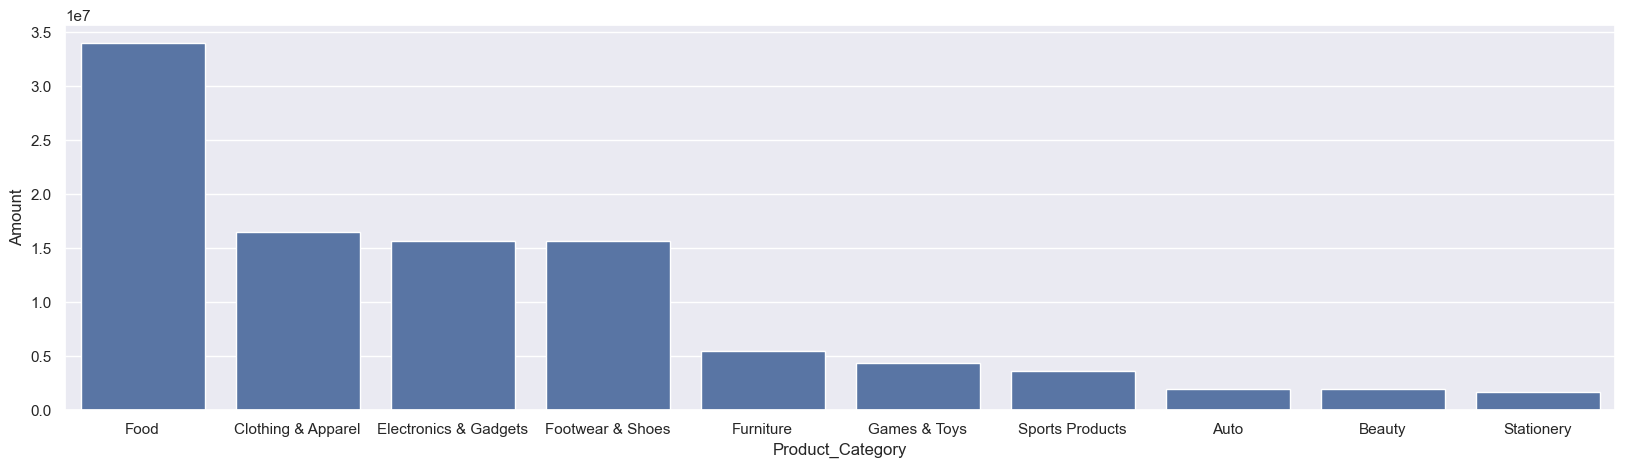

In [28]:
mg=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(x="Product_Category",y="Amount",data=mg)
plt.show()

From above graph we can see that most sold product are food,clothing & apparel and Electronics & gadgets etc.

Conclusion:
           Married women age group 0f 26-35yrs from up,maharashtra and karnatka working in it,healthcare and aviation are most likely to buy products from food,clothing and electronic category.